In [1]:
from midi_utils import midi2string, midiTrack2OnsetTimes, pbeFromOnsets, times2tempos
from PerceptualBeatEstimator import PerceptualBeatEstimator
from mido import MidiFile
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

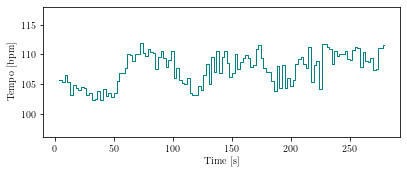

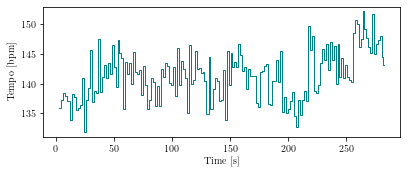

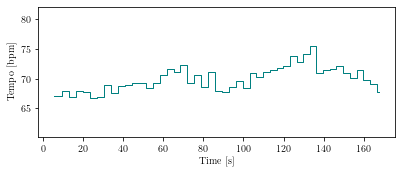

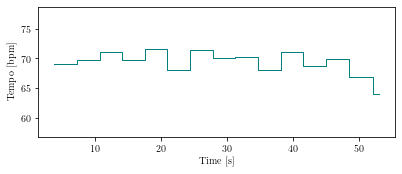

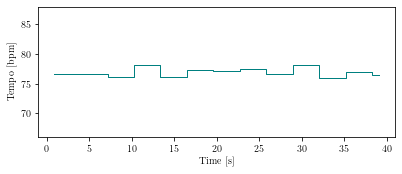

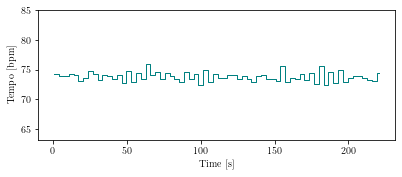

In [9]:
%matplotlib inline
test_dir = 'test_sets/live/'
pb = MidiFile(test_dir+'pb.mid')
#print(midi2string(pb))

for i, track in enumerate(pb.tracks):  # iterate through each track in the midi file
    if i==0:     # get tempo from track 0
        for msg in track:
            if msg.type=='set_tempo':
                tempo = msg.tempo
        continue
    
    # 1. Extract info about the performance stored in the track name
    trackInfo = (track.name).split(',')
    patternName = trackInfo[0]
    
    # 2. get times and calculate tempos at each interval
    times = midiTrack2OnsetTimes(track)
    t, tempos = times2tempos(times, window=4)
    
    # 3. plot tempo vs time

    f = plt.figure(figsize=(6.4,2.4))
    #plt.title('Tempo [bpm] vs. Time [s] of ' + patternName)
    plt.xlabel(r'Time [s]')
    plt.ylabel(r'Tempo [bpm]')
    plt.plot(t,tempos, linewidth=1, color='teal')
    ax = plt.gca()
    ymin, ymax = ax.get_ylim()
    mid = (ymax - ymin)/2 + ymin
    ymin_new = mid - 11
    ymax_new = mid + 11
    ax.set_ylim(ymin=ymin_new, ymax=ymax_new)
    f.savefig(f'tempo_plots_2/track_{i}.svg', bbox_inches='tight')


In [ ]:
xy = [(1,1),(2,1),(2,2),(3,2),(3,2.5)]
x, y = list(zip(*xy))

plt.plot(x,y)